In [95]:
##Dependencies
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import random as rd
np.random.seed(sum(map(ord, "aesthetics")))

In [96]:
## Read file and then sort 
csv_file = "companies.csv"
companies_df = pd.read_csv(csv_file, encoding="iso-8859-1",
                           parse_dates=["Founded Date","Closed Date",
                                        "Last Funding Date"])
companies_df = companies_df.sort_values("Company Name").reset_index(drop=True)
companies_df.head(5)


,Company Name,Company Name URL,Category Groups,Headquarters Location,Description,Crunchbase Rank,Founded Date,Closed Date,Number of Funding Rounds,Last Funding Date,Last Funding Amount,Last Funding Type,Total Funding Amount,Status
0,#waywire,https://www.crunchbase.com/organization/waywire,"Media and Entertainment, Government and Milita...","New York, New York, United States",#waywire is an online community focused on soc...,"21,987",2012-06-01,NaT,1,2012-06-30,"$1,750,000",Seed,"$1,750,000",Was Acquired
1,*gram Labs,https://www.crunchbase.com/organization/gram-labs,"Science and Engineering, Hardware, Data and An...","New York, New York, United States","GramLabs is a start up, leveraging deep learni...","11,897",2015-08-01,NaT,1,2016-07-27,"$1,000,000",Seed,"$1,000,000",Operating
2,.io,https://www.crunchbase.com/organization/io-rea...,Data and Analytics,"Alexandria, Virginia, United States",.io is a real-time intelligence platform.,"16,844",2015-03-01,NaT,1,2015-10-01,"$1,500,000",Seed,"$1,500,000",Operating
3,/dev/color,https://www.crunchbase.com/organization/dev-color,NaN,"Menlo Park, California, United States",/dev/color is a non-profit organization that a...,"35,003",2015-05-01,NaT,1,2016-08-23,"$120,000",Seed,"$120,000",Operating
4,10 By 10,https://www.crunchbase.com/organization/10-by-10,"Software, Professional Services","San Francisco, California, United States",10by10 builds a marketplace to more quickly ma...,"59,822",2015-01-01,NaT,1,2017-07-01,"$120,000",Seed,"$120,000",Operating


In [97]:
companies_df = companies_df[["Company Name", "Founded Date", "Closed Date", 
                             "Number of Funding Rounds", "Last Funding Date", 
                             "Last Funding Amount", "Total Funding Amount", "Status"]]
companies_df.head(5)

,Company Name,Founded Date,Closed Date,Number of Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status
0,#waywire,2012-06-01,NaT,1,2012-06-30,"$1,750,000","$1,750,000",Was Acquired
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,"$1,000,000","$1,000,000",Operating
2,.io,2015-03-01,NaT,1,2015-10-01,"$1,500,000","$1,500,000",Operating
3,/dev/color,2015-05-01,NaT,1,2016-08-23,"$120,000","$120,000",Operating
4,10 By 10,2015-01-01,NaT,1,2017-07-01,"$120,000","$120,000",Operating


In [98]:
companies_pf = companies_df.rename(columns={
    "Company Name" : "Company",
    "Number of Funding Rounds" : "Funding Rounds"   
})

companies_pf.head(5)

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status
0,#waywire,2012-06-01,NaT,1,2012-06-30,"$1,750,000","$1,750,000",Was Acquired
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,"$1,000,000","$1,000,000",Operating
2,.io,2015-03-01,NaT,1,2015-10-01,"$1,500,000","$1,500,000",Operating
3,/dev/color,2015-05-01,NaT,1,2016-08-23,"$120,000","$120,000",Operating
4,10 By 10,2015-01-01,NaT,1,2017-07-01,"$120,000","$120,000",Operating


In [99]:
## Read file and then sort 
funding = "Funding_Rounds.csv"
funding_df = pd.read_csv(funding, encoding="iso-8859-1", 
                         parse_dates=["Announced On Date"])
funding_df.head(5)


,Company Name,Company Name URL,Funding Type,Money Raised,Announced On Date
0,.io,https://www.crunchbase.com/organization/io-rea...,Seed,"$1,500,000",2015-10-01
1,*gram Labs,https://www.crunchbase.com/organization/gram-labs,Seed,"$1,000,000",2016-07-27
2,/dev/color,https://www.crunchbase.com/organization/dev-color,Seed,"$120,000",2016-08-23
3,#waywire,https://www.crunchbase.com/organization/waywire,Seed,"$1,750,000",2012-06-30
4,10 By 10,https://www.crunchbase.com/organization/10-by-10,Seed,"$120,000",2017-07-01


In [100]:
funding_df = funding_df[["Company Name", "Funding Type", "Money Raised", 
                         "Announced On Date"]]
funding_df.head(5)

,Company Name,Funding Type,Money Raised,Announced On Date
0,.io,Seed,"$1,500,000",2015-10-01
1,*gram Labs,Seed,"$1,000,000",2016-07-27
2,/dev/color,Seed,"$120,000",2016-08-23
3,#waywire,Seed,"$1,750,000",2012-06-30
4,10 By 10,Seed,"$120,000",2017-07-01


In [101]:
funding_pf = funding_df.rename(columns={
    "Company Name" : "Company"
})

funding_pf.head()

,Company,Funding Type,Money Raised,Announced On Date
0,.io,Seed,"$1,500,000",2015-10-01
1,*gram Labs,Seed,"$1,000,000",2016-07-27
2,/dev/color,Seed,"$120,000",2016-08-23
3,#waywire,Seed,"$1,750,000",2012-06-30
4,10 By 10,Seed,"$120,000",2017-07-01


In [102]:
# Merge companies_pf and funding_pf on Company
merged_data = pd.merge(companies_pf, funding_pf,how="inner",on="Company")
merged_data.head(5)



,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date
0,#waywire,2012-06-01,NaT,1,2012-06-30,"$1,750,000","$1,750,000",Was Acquired,Seed,"$1,750,000",2012-06-30
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,"$1,000,000","$1,000,000",Operating,Seed,"$1,000,000",2016-07-27
2,.io,2015-03-01,NaT,1,2015-10-01,"$1,500,000","$1,500,000",Operating,Seed,"$1,500,000",2015-10-01
3,/dev/color,2015-05-01,NaT,1,2016-08-23,"$120,000","$120,000",Operating,Seed,"$120,000",2016-08-23
4,10 By 10,2015-01-01,NaT,1,2017-07-01,"$120,000","$120,000",Operating,Seed,"$120,000",2017-07-01


In [103]:
# Save Data to csv without index, with header
#merged_data.to_csv("merged_company_funding.csv", index=False, header=True)

In [104]:
## Read file and then sort 
org = "organizations.csv"
org_df = pd.read_csv(org, encoding="iso-8859-1")
org_df.head(5)                              

,UNKNOWN,UUID,Company Name,Homepage
0,352124,ea359946-4db6-5eee-b466-bd0774491e2d,1,http://y.com
1,24310,019602e2-8727-7fc1-af9f-4134dc629ca5,39,http://39inc.com
2,62273,01eb53db-bcee-c57f-3ab1-54fb53f6de65,55,http://www.fifty-five.com
3,231876,c1723121-d8a2-457c-1b81-25fc42e78d95,99,http://www.99taxis.com
4,402099,934bd25a-4b91-9d78-12c3-524c679d3e69,101,http://www.101edu.co/


In [105]:
# Rename columns for readability
new_file = org_df.rename(columns={
    "crunchbase_uuid": "UUID",
    "Company Name" : "Company",
    "homepage_url" : "Homepage"   
})

new_file.head(5)

,UNKNOWN,UUID,Company,Homepage
0,352124,ea359946-4db6-5eee-b466-bd0774491e2d,1,http://y.com
1,24310,019602e2-8727-7fc1-af9f-4134dc629ca5,39,http://39inc.com
2,62273,01eb53db-bcee-c57f-3ab1-54fb53f6de65,55,http://www.fifty-five.com
3,231876,c1723121-d8a2-457c-1b81-25fc42e78d95,99,http://www.99taxis.com
4,402099,934bd25a-4b91-9d78-12c3-524c679d3e69,101,http://www.101edu.co/


In [106]:
new_file = new_file[["UUID", "Company", "Homepage"]]
new_file.head()


,UUID,Company,Homepage
0,ea359946-4db6-5eee-b466-bd0774491e2d,1,http://y.com
1,019602e2-8727-7fc1-af9f-4134dc629ca5,39,http://39inc.com
2,01eb53db-bcee-c57f-3ab1-54fb53f6de65,55,http://www.fifty-five.com
3,c1723121-d8a2-457c-1b81-25fc42e78d95,99,http://www.99taxis.com
4,934bd25a-4b91-9d78-12c3-524c679d3e69,101,http://www.101edu.co/


In [107]:
# Save Data to csv without index, with header
#new_file.to_csv("new_org.csv", index=False, header=True)

In [108]:
merged_df = pd.merge(merged_data, new_file,how="inner",on="Company")
merged_df.head(5)

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
0,#waywire,2012-06-01,NaT,1,2012-06-30,"$1,750,000","$1,750,000",Was Acquired,Seed,"$1,750,000",2012-06-30,3ca06819-3ca9-ce42-ce20-f0e150d563a0,http://www.waywire.com
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,"$1,000,000","$1,000,000",Operating,Seed,"$1,000,000",2016-07-27,18e8dd5e-fe1d-5f8e-f2ed-b254171d7f5d,http://www.gramlabs.ai
2,.io,2015-03-01,NaT,1,2015-10-01,"$1,500,000","$1,500,000",Operating,Seed,"$1,500,000",2015-10-01,cf169e68-c903-c089-8789-bdd557d6a4c1,https://onthe.io
3,/dev/color,2015-05-01,NaT,1,2016-08-23,"$120,000","$120,000",Operating,Seed,"$120,000",2016-08-23,165f412c-361d-7931-fd3b-cf5e2a1ccef3,http://www.devcolor.org/
4,10 By 10,2015-01-01,NaT,1,2017-07-01,"$120,000","$120,000",Operating,Seed,"$120,000",2017-07-01,e1670a30-4ff5-893d-0ae3-ceb761e1c251,https://www.10by10.io/


In [109]:
# Convert fields to usable formats
merged_df["Money Raised"] = merged_df["Money Raised"].str.strip() \
                                                   .replace('[\$,]','', regex=True ).astype(np.int64)
    
merged_df["Last Funding Amount"] = merged_df["Last Funding Amount"] \
                                                   .replace('[\$,]','', regex=True ).astype(np.int64)
merged_df["Total Funding Amount"] = merged_df["Total Funding Amount"] \
                                                   .replace('[\$,]','', regex=True ).astype(np.int64)
merged_df.head(5)

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired,Seed,1750000,2012-06-30,3ca06819-3ca9-ce42-ce20-f0e150d563a0,http://www.waywire.com
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating,Seed,1000000,2016-07-27,18e8dd5e-fe1d-5f8e-f2ed-b254171d7f5d,http://www.gramlabs.ai
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating,Seed,1500000,2015-10-01,cf169e68-c903-c089-8789-bdd557d6a4c1,https://onthe.io
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating,Seed,120000,2016-08-23,165f412c-361d-7931-fd3b-cf5e2a1ccef3,http://www.devcolor.org/
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating,Seed,120000,2017-07-01,e1670a30-4ff5-893d-0ae3-ceb761e1c251,https://www.10by10.io/


In [110]:
# works
for i, el in enumerate(merged_df.iterrows()):
    val = el[1]['UUID'].replace("-", "")
    merged_df.set_value(i, "UUID", val)
merged_df.head(5)

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired,Seed,1750000,2012-06-30,3ca068193ca9ce42ce20f0e150d563a0,http://www.waywire.com
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating,Seed,1000000,2016-07-27,18e8dd5efe1d5f8ef2edb254171d7f5d,http://www.gramlabs.ai
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating,Seed,1500000,2015-10-01,cf169e68c903c0898789bdd557d6a4c1,https://onthe.io
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating,Seed,120000,2016-08-23,165f412c361d7931fd3bcf5e2a1ccef3,http://www.devcolor.org/
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating,Seed,120000,2017-07-01,e1670a304ff5893d0ae3ceb761e1c251,https://www.10by10.io/


In [111]:
# Save Data to csv without index, with header
#merged_df.to_csv("all_files_merged_df.csv", index=False, header=True)

In [112]:
# Expore the data
min_found_date = min(merged_df["Founded Date"])
print("Min founded date ", min_found_date)

Min founded date  2012-01-01 00:00:00


In [113]:
# Expore the data
max_close_date = max(merged_df["Closed Date"])
print("Max closed date ", max_close_date)

Max closed date  NaT


In [114]:
# Expore the data
# 286 records with Status == "Closed"
closed_df = merged_df.loc[merged_df["Status"] == "Closed"]
closed_df.head(5)
#print(len(closed_df.index))

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
31,27 Perry,2012-01-01,2013-01-01,1,2012-05-17,118000,118000,Closed,Seed,118000,2012-05-17,40d8d076df13484162029389201bb1fa,http://www.27perry.com
58,4wrdtech,2015-05-29,NaT,1,2015-12-08,80000,80000,Closed,Seed,80000,2015-12-08,84420e6294f4ea624ed9711a96f467c9,https://4wrdtech.com
200,Accordion Health,2014-05-14,2017-06-01,2,2015-11-01,1000000,1150000,Closed,Seed,1000000,2015-11-01,dad5fb42208622ca30fc7db8349a3a1c,https://accordionhealth.com
201,Accordion Health,2014-05-14,2017-06-01,2,2015-11-01,1000000,1150000,Closed,Seed,150000,2014-07-02,dad5fb42208622ca30fc7db8349a3a1c,https://accordionhealth.com
426,Alekto,2012-07-01,2013-01-01,1,2012-08-27,50000,50000,Closed,Seed,50000,2012-08-27,0e19d30ebf03535f97daef13751335e0,http://www.alekto.co


In [115]:
# 9302 records with Status == "Operating"
oper_df = merged_df.loc[merged_df["Status"] == "Operating"]
oper_df.head(5)
#print(len(oper_df.index))

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating,Seed,1000000,2016-07-27,18e8dd5efe1d5f8ef2edb254171d7f5d,http://www.gramlabs.ai
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating,Seed,1500000,2015-10-01,cf169e68c903c0898789bdd557d6a4c1,https://onthe.io
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating,Seed,120000,2016-08-23,165f412c361d7931fd3bcf5e2a1ccef3,http://www.devcolor.org/
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating,Seed,120000,2017-07-01,e1670a304ff5893d0ae3ceb761e1c251,https://www.10by10.io/
5,10-4 Systems,2012-01-01,NaT,1,2016-06-27,13900000,13900000,Operating,Series A,13900000,2016-06-27,35ca612cf370d2dfe3db63554192f84a,https://www.10-4.com/


In [116]:
# Funding Type counts
funding_type = merged_df["Funding Type"].value_counts()
funding_type

Seed        6030
Series A    2864
Series B    1046
Series C     279
Series D      59
Name: Funding Type, dtype: int64

In [117]:
# groupby Funding Type and count states within each type
status = merged_df.groupby('Funding Type')["Status"].value_counts()
status.head(10)

Funding Type  Status      
Seed          Operating       5434
              Was Acquired     371
              Closed           222
              IPO                3
Series A      Operating       2594
              Was Acquired     203
              Closed            51
              IPO               16
Series B      Operating        953
              Was Acquired      65
Name: Status, dtype: int64

In [118]:
df1 = pd.DataFrame(status).rename(columns={
    'Status':'Count'})

df1.head(5)

Count
Funding Type Status             
Seed         Operating      5434
             Was Acquired    371
             Closed          222
             IPO               3
Series A     Operating      2594

In [119]:
series_d = merged_df[merged_df['Funding Type'] == "Series D"]
series_d

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
82,908 Devices,2012-01-01,NaT,5,2017-03-15,20000000,49300000,Operating,Series D,20000000,2017-03-15,9c3b4ae472afb6d63f029c811f56fb40,http://908devices.com
421,Alector,2013-01-01,NaT,3,2016-01-07,29500000,61500000,Operating,Series D,29500000,2016-01-07,9dd3b221ff3bbdb834da7774e6510b63,http://alector.com
933,AveXis,2013-01-01,NaT,4,2015-09-08,65000000,75000000,Was Acquired,Series D,65000000,2015-09-08,b09be91c91a9632e870dc5ed83c46717,https://avexis.com/
1325,Blend,2012-05-01,NaT,5,2017-08-24,100000000,160000000,Operating,Series D,100000000,2017-08-24,e35a34d36b1d1d5b1665190c7daa4460,http://www.blendsd.com
1326,Blend,2012-05-01,NaT,5,2017-08-24,100000000,160000000,Operating,Series D,100000000,2017-08-24,5058d5cd4c08c241165923dec5136c9d,https://www.blend.com
1327,Blend,2012-05-01,NaT,5,2017-08-24,100000000,160000000,Operating,Series D,100000000,2017-08-24,a2c48634a8fd8030f6a1306cf29d50ff,http://www.blend.life
1650,Bustle Digital Group,2013-01-01,NaT,5,2017-03-10,12000000,50500000,Operating,Series D,12000000,2017-03-10,b7d88b9f3a746aea845159ecd4851518,http://bustle.com
1839,Catalant,2013-01-01,NaT,5,2017-06-27,41000000,75550000,Operating,Series D,41000000,2017-06-27,45a8a2d2d13fb336348a2b0bc1a80b01,http://www.gocatalant.com
1840,Catalant,2013-01-01,NaT,5,2017-06-27,41000000,75550000,Operating,Series D,41000000,2017-06-27,9b67b0f7b229dcf63a1bb4ecc971ce14,http://catalant.co
2064,CloudHealth Technologies,2012-01-01,NaT,5,2017-06-27,46000000,85700000,Operating,Series D,46000000,2017-06-27,1ea93e4f355c999ba61d96482d7e42ee,http://www.cloudhealthtech.com


In [120]:
funding_df = merged_df[merged_df['Funding Type'] == "Seed"]
funding_df

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired,Seed,1750000,2012-06-30,3ca068193ca9ce42ce20f0e150d563a0,http://www.waywire.com
1,*gram Labs,2015-08-01,NaT,1,2016-07-27,1000000,1000000,Operating,Seed,1000000,2016-07-27,18e8dd5efe1d5f8ef2edb254171d7f5d,http://www.gramlabs.ai
2,.io,2015-03-01,NaT,1,2015-10-01,1500000,1500000,Operating,Seed,1500000,2015-10-01,cf169e68c903c0898789bdd557d6a4c1,https://onthe.io
3,/dev/color,2015-05-01,NaT,1,2016-08-23,120000,120000,Operating,Seed,120000,2016-08-23,165f412c361d7931fd3bcf5e2a1ccef3,http://www.devcolor.org/
4,10 By 10,2015-01-01,NaT,1,2017-07-01,120000,120000,Operating,Seed,120000,2017-07-01,e1670a304ff5893d0ae3ceb761e1c251,https://www.10by10.io/
9,10sec,2013-07-08,NaT,2,2014-05-08,1600000,1600000,Operating,Seed,1600000,2014-05-08,79fd01f688736282a9ea27622d0bbdcb,https://10s.ec/
10,12 Labs,2014-08-01,NaT,1,2014-11-26,935000,935000,Operating,Seed,935000,2014-11-26,74a66ef358d3adec5740ae7794dd6dbd,http://www.getapplause.com/
11,121 Mobile,2012-02-17,NaT,4,2015-12-18,2200000,4000000,Operating,Seed,2200000,2015-12-18,8d43a7efac3c3977c8d7b62377f1d97a,http://my121mobile.com
12,128 Technology,2014-07-07,NaT,4,2017-05-31,21500000,57499347,Operating,Seed,4000000,2014-07-07,b87dd21c6fbd9c7d43ee3ce97387825e,https://www.128technology.com/
16,17hats,2014-01-01,NaT,2,2015-10-15,4000000,5250000,Operating,Seed,1250000,2015-02-18,c852c5d3220d2eb6c78e3c9148430ce4,https://www.17hats.com


In [121]:
seed = merged_df[merged_df['Status'] == "Was Acquired"].count
seed_df = merged_df[merged_df['Funding Type'] == "Seed"]

seed_df = seed_df[seed_df['Status'] == "Was Acquired"]

seed_df

,Company,Founded Date,Closed Date,Funding Rounds,Last Funding Date,Last Funding Amount,Total Funding Amount,Status,Funding Type,Money Raised,Announced On Date,UUID,Homepage
0,#waywire,2012-06-01,NaT,1,2012-06-30,1750000,1750000,Was Acquired,Seed,1750000,2012-06-30,3ca068193ca9ce42ce20f0e150d563a0,http://www.waywire.com
97,ADSHIFT,2013-01-01,NaT,1,2016-02-23,650000,650000,Was Acquired,Seed,650000,2016-02-23,360b3ff456ea726878f6c01978e94f60,https://adshift.com/
165,Abakus,2013-01-01,NaT,1,2013-12-25,825000,825000,Was Acquired,Seed,825000,2013-12-25,def201e83bc97dffe76410a6371121eb,http://abakus.me
166,Abakus,2013-01-01,NaT,1,2013-12-25,825000,825000,Was Acquired,Seed,825000,2013-12-25,7e5d80ede34c3c4bc34c0099b4c5ea4f,http://www.abakus.com
167,AbbeyPost,2012-08-01,NaT,5,2014-07-11,425000,875000,Was Acquired,Seed,425000,2014-07-11,746e8b918c67072ab0718695a540b4e4,http://abbeypost.com
168,AbbeyPost,2012-08-01,NaT,5,2014-07-11,425000,875000,Was Acquired,Seed,225000,2014-04-06,746e8b918c67072ab0718695a540b4e4,http://abbeypost.com
169,AbbeyPost,2012-08-01,NaT,5,2014-07-11,425000,875000,Was Acquired,Seed,100000,2014-01-30,746e8b918c67072ab0718695a540b4e4,http://abbeypost.com
170,AbbeyPost,2012-08-01,NaT,5,2014-07-11,425000,875000,Was Acquired,Seed,25000,2013-07-30,746e8b918c67072ab0718695a540b4e4,http://abbeypost.com
217,Acquaintable,2012-01-01,NaT,1,2013-01-07,40000,40000,Was Acquired,Seed,40000,2013-01-07,f75d10185b16b32cef9109c7bcd44341,http://acquaintable.com
224,ActionX,2012-01-01,NaT,2,2013-09-16,3000000,5000000,Was Acquired,Seed,2000000,2012-03-01,b4c2c24dcdc166659e541e593f695085,http://actionx.com


In [122]:
# # Build a scatter plot for each data type
# plt.scatter(seed_df["Funding Type"], 
#             seed_df["Status"],
#             s=100, edgecolor="black", linewidths=1, c="red", marker="o", 
#             alpha=0.8)

# # Incorporate the other graph properties
# plt.title("Funding Type Status")
# plt.ylabel("Funding Type")
# plt.xlabel("Status")
# plt.grid(True)

# # Save the figure
# plt.savefig("funding_type_scatter_chart.png")

# # Show plot
# plt.show()

In [123]:
# #seed = merged_df[merged_df['Status'] == "Operating"]
# seed = merged_df[merged_df['Status'] == "Was Acquired"]
# seed = merged_df[merged_df['Status'] == "Closed"]
# seed = merged_df[merged_df['Status'] == "IPO"]

# # # x-axis
# seed_operating = seed.groupby(["Status"]).count()["Closed"]
# # #y-axis
# seed_acquired = seed.groupby(["Status"]).count()["Was Acquired"]

# # # x-axis
# seed_closedt = seed.groupby(["Status"]).count()["Closed"]
# # #y-axis
# seed_ips = seed.groupby(["Status"]).count()["IPO"]

# # # # x-axis
# # rural_ride_count = rural_cities.groupby(["city"]).count()["fare"]
# # # #y-axis
# # rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

# # # # x-axis
# # suburban_ride_count = suburban_cities.groupby(["city"]).count()["fare"]
# # # #y-axis
# # suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]


In [124]:
funding_sum = merged_df.groupby('Funding Type')["Money Raised"].sum()
funding_sum

Funding Type
Seed         7779876098
Series A    28365357631
Series B    24141335760
Series C    12869981307
Series D     4330750000
Name: Money Raised, dtype: int64

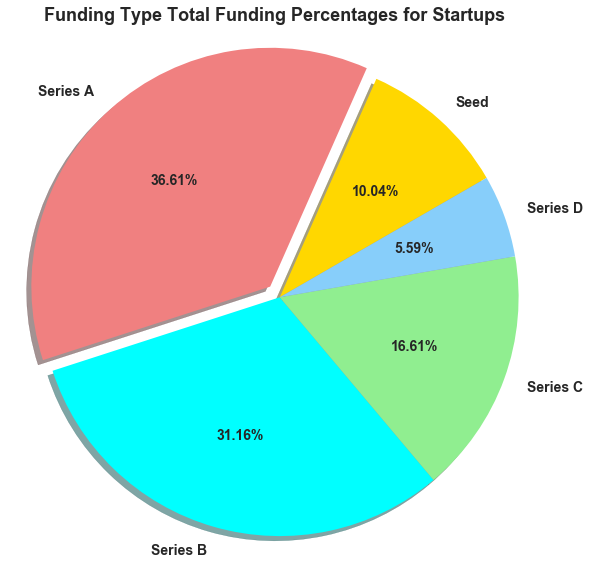

In [125]:
plt.rcParams['font.size'] = 12.0
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111)

types_area = ["Seed", "Series A", "Series B", "Series C","Series D" ]
numbers = funding_sum
colors = ["gold", "lightcoral", "cyan", "lightgreen", "lightskyblue"]
explode = (0, 0.06, 0, 0, 0)

x_axis = np.arange(0, len(types_area))

ax.set_title("Funding Type Total Funding Percentages for Startups", 
             weight='bold').set_fontsize('18')
ax.pie(numbers, explode=explode, labels=types_area, colors=colors,
       autopct="%1.2f%%", textprops={'weight': 'bold', 'fontsize':'14'},
       shadow=True, startangle=30)
ax.axis("equal")

# Save the figure
plt.tight_layout()
plt.savefig("funding_type_sum_pie_chart.png")

plt.show()

In [126]:
# sum of counts is 10278
funding_pct = merged_df.groupby('Funding Type')["Money Raised"].count()
funding_pct


Funding Type
Seed        6030
Series A    2864
Series B    1046
Series C     279
Series D      59
Name: Money Raised, dtype: int64

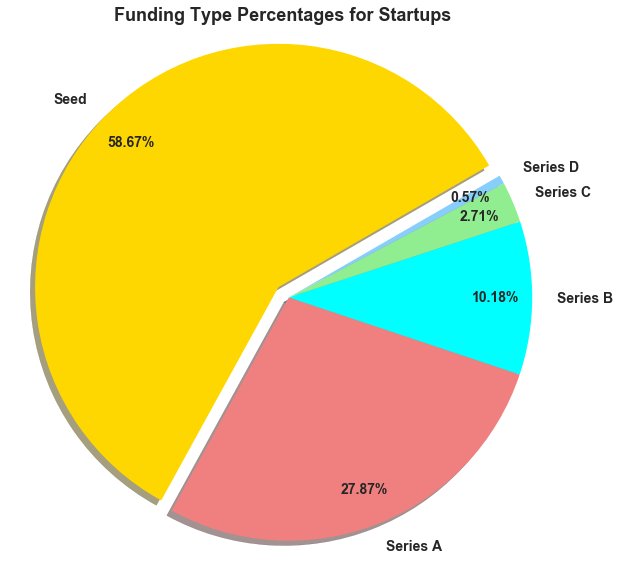

In [127]:
plt.rcParams['font.size'] = 12.0

fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111)

types_area = ["Seed", "Series A", "Series B", "Series C","Series D" ]
numbers = funding_pct
colors = ["gold", "lightcoral", "cyan", "lightgreen", "lightskyblue"]
explode = (0.06, 0, 0, 0, 0)

x_axis = np.arange(0, len(types_area))

ax.set_title("Funding Type Percentages for Startups", weight='bold').set_fontsize('18')

ax.pie(numbers, explode=explode, 
       labels=types_area, colors=colors,
       autopct="%1.2f%%", textprops={'weight': 'bold', 'fontsize':'14'}, 
       shadow=True, startangle=30, pctdistance=.85, labeldistance=1.1)

ax.axis("equal")

# Save the figure
plt.tight_layout()
plt.savefig("funding_type_count_pie_chart.png")

plt.show()

In [128]:
# y axis for funding_average_per_type_bar_chart 
fund_avgs = np.array(merged_df.groupby('Funding Type')["Money Raised"].median())
#fund_avgs

In [129]:
# x axis for funding_average_per_type_bar_chart 
funding_types = merged_df["Funding Type"].unique()
#funding_types

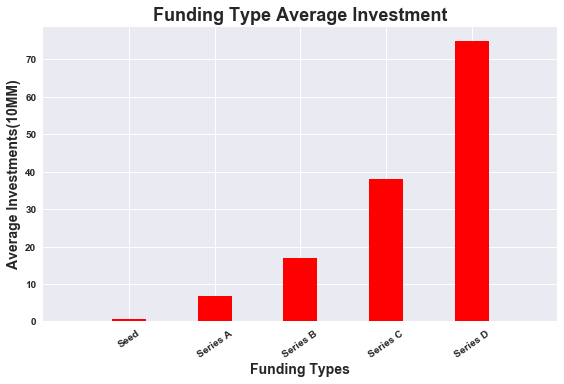

In [130]:
# funding_average_per_type_bar_chart 
# Dependencies
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)

x_axis = np.arange(1, len(funding_types)+ 1)
xtick_locations = [x for x in x_axis]

ax.set_title("Funding Type Average Investment", weight='bold').set_fontsize('18')
ax.set_xlabel("Funding Types", weight='bold').set_fontsize('14')
ax.set_ylabel("Average Investments(10MM)", weight='bold').set_fontsize('14')

ax.set_xlim(0, len(funding_types)+ 1)

plt.ticklabel_format(style = 'plain')

ax.bar(x_axis, fund_avgs, facecolor="red", width=.4)
ax.set_xticks(xtick_locations)

ax.set_xticklabels(funding_types, rotation=35, weight='bold')
ax.set_yticklabels([0,10,20,30,40,50,60,70],
                   rotation=360, weight='bold')

plt.tight_layout()
plt.savefig("funding_type_avg_investment_bar_chart.png")
plt.show()

In [131]:
## File without urls required for screen scraping.  
## Read file and then sort 
csv_file = "top_50_orgs.csv"
top_50_orgs = pd.read_csv(csv_file, encoding="iso-8859-1", parse_dates=["Announced On Date"])
top_50_orgs = top_50_orgs.sort_values("Funding Type").reset_index(drop=True)
top_50_orgs["Homepage"] = top_50_orgs["Homepage"].replace(np.nan, '', regex=True)
top_50_orgs.head(5)

,Company,Homepage,Funding Type,Money Raised,Announced On Date
0,"Bestow, Inc.",,Seed,"$2,500,000",2017-08-29
1,PrimaryIO,,Seed,"$5,600,000",2017-08-25
2,Polygram,,Seed,"$2,100,000",2017-08-25
3,Sahi Cosmetics,,Seed,"$100,000",2017-08-25
4,Romeo Power,,Seed,"$30,000,000",2017-08-24


In [132]:
# # The original top_orgs.xslx had the wrong url so this is a 
# # manual process to get the Homepage for Screen Scraping.
# # To sutomate the url retrievel process you can build off 
# # this manual process.
# # 
# # 1) Remove duplicates from copy of merged_df
# # 2) Copy the output into top_orgs_search_results.txt
# # 3) Manually copy the homepage url into top_orgs.xlsx and
# #    create top_orgs.csv.
# # 4) Searched organizations.xlsx manually and found Ripcord, 
# #    IndoorAtlas, and Truss.
# # 5) Found 46 of 50 urls.

# Copy merged_df to a temp data frame for processing
tmp_merged_df = merged_df

# Remove duplicates method 1:
# tmp_merged_df = tmp_merged_df.groupby(["Company","Homepage"]).max()
# tmp_merged_df.reset_index(inplace=True)
# or
# Remove duplicates method 2:
tmp_merged_df = tmp_merged_df.drop_duplicates(subset=["Company","Homepage"],
                                              keep="last").reset_index(drop=True)

count = 0

## Iterate over the top_orgs rows and lookup the homepage via the Company
## This doesn't give what I want so I manually copied the url into top_orgs.xlsx
## and created top_orgs.csv.
for index, row in top_50_orgs.iterrows():
    try:
        # Use Company to get Homepage
        print("This is the result for: ", row["Company"])
        #print(tmp_merged_df.loc[tmp_merged_df["Company"] == row["Company"],["Homepage"]].values)
        print(tmp_merged_df.loc[tmp_merged_df["Company"] == row["Company"],["Homepage"]])
        count += 1
        ## Set the cell info for Homepage (Doesn't work!)
        # example: print(df.loc[df['D'] == 14]['A'].values)
        #url = tmp_merged_df.loc[tmp_merged_df["Company"] == row["Company"],["Homepage"]]
        #top_50_orgs.set_value(index, "Homepage", url)
    except:
        print("Error for: ", row["Company"])  

print("top_orgs rows processed: ", count)


This is the result for:  Bestow, Inc.
                        Homepage
789  https://www.hellobestow.com
This is the result for:  PrimaryIO
Empty DataFrame
Columns: [Homepage]
Index: []
This is the result for:  Polygram
Empty DataFrame
Columns: [Homepage]
Index: []
This is the result for:  Sahi Cosmetics
Empty DataFrame
Columns: [Homepage]
Index: []
This is the result for:  Romeo Power
                     Homepage
4624  https://romeopower.com/
This is the result for:  Square Roots Urban Growers
                            Homepage
5201  http://www.squarerootsgrow.com
This is the result for:  Gabi
                   Homepage
2257  https://www.gabi.com/
This is the result for:  Apic Bio
                      Homepage
420  https://www.apic-bio.com/
This is the result for:  Indiez
                  Homepage
2763  http://www.indiez.io
This is the result for:  leap.ai
                 Homepage
6595  https://www.leap.ai
This is the result for:  Truss
Empty DataFrame
Columns: [Homepage]
Index:

In [133]:
## File with url manually added for screen scraping using
## the output file top_orgs_match_orgs_results.docx
## Read file and then sort 
csv_file = "top_orgs.csv"
top_orgs = pd.read_csv(csv_file, encoding="iso-8859-1", parse_dates=["Announced On Date"])
top_orgs = top_orgs.sort_values("Funding Type").reset_index(drop=True)
top_orgs.head(5)


,Company,Funding Type,Money Raised,Announced On Date,Homepage
0,"Bestow, Inc.",Seed,"$2,500,000",2017-08-29,https://www.hellobestow.com
1,PrimaryIO,Seed,"$5,600,000",2017-08-25,NaN
2,Polygram,Seed,"$2,100,000",2017-08-25,NaN
3,Sahi Cosmetics,Seed,"$100,000",2017-08-25,NaN
4,Romeo Power,Seed,"$30,000,000",2017-08-24,https://romeopower.com/


In [134]:
import numpy as np

top_orgs["Money Raised"] = top_orgs["Money Raised"].replace('[\$,]','', regex=True).astype(np.int64)
top_orgs["Homepage"] = top_orgs["Homepage"].replace(np.nan, '', regex=True)

top_orgs["Total Visits"] = ""
top_orgs["Avg Visit Duration"] = ""
top_orgs["Pages Per Visit"] = ""
top_orgs["Bounce Rate"] = ""
print(len(top_orgs.index))
top_orgs.head(5)


50


,Company,Funding Type,Money Raised,Announced On Date,Homepage,Total Visits,Avg Visit Duration,Pages Per Visit,Bounce Rate
0,"Bestow, Inc.",Seed,2500000,2017-08-29,https://www.hellobestow.com,,,,
1,PrimaryIO,Seed,5600000,2017-08-25,,,,,
2,Polygram,Seed,2100000,2017-08-25,,,,,
3,Sahi Cosmetics,Seed,100000,2017-08-25,,,,,
4,Romeo Power,Seed,30000000,2017-08-24,https://romeopower.com/,,,,


In [135]:
# Save file with urls prior to scraping.to csv without index, with header
#top_orgs.to_csv("pre-screen_scrape_data.csv", index=False, header=True)

In [136]:
## Web scraping program with 20 second sleep time.
## Consider using a smaller subset of data for scraping.

##  Test URL https://www.similarweb.com/website/shotput.com#overview 

## Splinter documenation:
## https://github.com/douglasmiranda/splinter-examples/blob/master/another_examples/screenshot.py
## http://splinter.readthedocs.io/en/latest/tutorial.html

## BeautifulSoup Documentation:
## https://www.crummy.com/software/BeautifulSoup/bs4/doc


# from splinter import Browser
# import csv
# from bs4 import BeautifulSoup 
# import time

# # browser = Browser('chrome')
# # browser = Browser('firefox')

# with Browser() as browser:
#     # Visit URL
#     url1 = "https://www.similarweb.com/website/" 
#     url_suffix = "#overview"
    
#     # loop thru the urls top_orgs data frame 
#     counter = 0
#     for index, row in top_orgs.iterrows():
#         url = ""
#         #print(type(row["Homepage"]))
#         url2 = row["Homepage"].split('/')
#         if len(url2) > 2:
#             counter += 1
#             url = url1 + url2[2] + url_suffix
#             print("url counter: ", counter,end=" - ")
#             print(url)
        
#             try:
#                 browser.visit(url)
#                 time.sleep(20)
#                 html = browser.html
#                 soup = BeautifulSoup(html, "html.parser")
            
#                 #print(soup.prettify())
   
#                 count = 0
#                 # Grab the 4 activity stats from the html 
#                 for line in soup.findAll('span',class_="engagementInfo-valueNumber js-countValue"):
#                     print(line.get_text())
#                     count += 1
#                     # Write to a data frame
#                     if count == 1:
#                         top_orgs.set_value(index, "Total Visits", line.getText())
#                     elif count == 2:
#                         top_orgs.set_value(index, "Avg Visit Duration", line.getText())
#                     elif count == 3:
#                         top_orgs.set_value(index, "Pages Per Visit", line.getText())
#                     else:
#                         top_orgs.set_value(index, "Bounce Rate", line.getText())
#             except:
#                 print("Error with url: ", url)  
# top_orgs
# print("urls processed: ", counter)


In [137]:
# If we screen scraped then save data to csv without index, with header
#top_orgs.to_csv("screen_scrape_data.csv", index=False, header=True)

In [152]:
## Reload data to work with Screen scrape data without more scraping
## Read file 

csv_file = "screen_scrape_data.csv"
top_orgs = pd.read_csv(csv_file, encoding="iso-8859-1", parse_dates=["Announced On Date"])

top_orgs["Money Raised"] = top_orgs["Money Raised"].replace('[\$,]','', regex=True ).astype(np.int64)
top_orgs["Homepage"] = top_orgs["Homepage"].replace(np.nan, '', regex=True)
top_orgs["Total Visits"] = top_orgs["Total Visits"].replace(np.nan, 0, regex=True)
#top_orgs["Avg Visit Duration"] = top_orgs["Avg Visit Duration"].replace(np.nan, '', regex=True)
top_orgs["Pages Per Visit"] = top_orgs["Pages Per Visit"].replace(np.nan, 0, regex=True)
top_orgs["Bounce Rate"] = top_orgs["Bounce Rate"].replace(np.nan, 0, regex=True)

top_orgs.head(7)
#top_orgs.dtypes

,Company,Funding Type,Money Raised,Announced On Date,Homepage,Total Visits,Avg Visit Duration,Pages Per Visit,Bounce Rate
0,"Bestow, Inc.",Seed,2500000,2017-08-29,https://www.hellobestow.com,0,NaN,0.00,0
1,PrimaryIO,Seed,5600000,2017-08-25,,0,NaN,0.00,0
2,Polygram,Seed,2100000,2017-08-25,,0,NaN,0.00,0
3,Sahi Cosmetics,Seed,100000,2017-08-25,,0,NaN,0.00,0
4,Romeo Power,Seed,30000000,2017-08-24,https://romeopower.com/,<12K,0:01:50,2.10,59.12%
5,Square Roots Urban Growers,Seed,5400000,2017-08-23,http://www.squarerootsgrow.com,73.26K,0:01:17,2.72,13.85%
6,Gabi,Seed,2600000,2017-08-23,https://www.gabi.com/,<12K,0:03:36,7.39,31.86%


In [139]:
# # Remove rows we don't need to process
# top_orgs = top_orgs.loc[top_orgs["Total Visits"]!= "",["Company","Funding Type",
#                            "Money Raised","Announced On Date","Homepage","Total Visits",
#                            "Avg Visit Duration","Pages Per Visit","Bounce Rate"]]

#top_orgs.dtypes
#print(len(top_orgs.index))
#top_orgs.head(7)

In [153]:
## This code doesn't work yet...  39 rows with 12K like strings
##                                 5 rows with 5.36M like strings

## Total Visits: strip non-numeric characters and convert to float64
for index, row in top_orgs.iterrows():
    print("index is: ", index)
    print(row["Total Visits"])
    print(type(row["Total Visits"]))
    
    string1 = str(row["Total Visits"])
    if "K" in string1:
        string1 = string1.replace('K','')
        string1 = string1.replace('<','')
        flstring1 = float(string1) * 1000
        print("string1 with a K is ", string1)
        top_orgs.set_value(index, "Total Visits", flstring1)
    else:
        string1 = string1.replace('M','')
        string1 = string1.replace('<','')
        flstring1 = float(string1) * 1000000
        print("other string1 is ", string1)
        top_orgs.set_value(index, "Total Visits", flstring1)
    
    #row["Total Visits"] = row["Total Visits"].replace('[<>KM]','',regex=True).astype(np.float64)* 1000

top_orgs["Total Visits"] = top_orgs["Total Visits"].astype(np.float64)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
    
top_orgs   
#top_orgs.dtypes

index is:  0
0
<class 'int'>
other string1 is  0
index is:  1
0
<class 'int'>
other string1 is  0
index is:  2
0
<class 'int'>
other string1 is  0
index is:  3
0
<class 'int'>
other string1 is  0
index is:  4
<12K
<class 'str'>
string1 with a K is  12
index is:  5
73.26K
<class 'str'>
string1 with a K is  73.26
index is:  6
<12K
<class 'str'>
string1 with a K is  12
index is:  7
0
<class 'int'>
other string1 is  0
index is:  8
15.28K
<class 'str'>
string1 with a K is  15.28
index is:  9
<12K
<class 'str'>
string1 with a K is  12
index is:  10
<12K
<class 'str'>
string1 with a K is  12
index is:  11
<12K
<class 'str'>
string1 with a K is  12
index is:  12
628.90K
<class 'str'>
string1 with a K is  628.90
index is:  13
12.91K
<class 'str'>
string1 with a K is  12.91
index is:  14
<12K
<class 'str'>
string1 with a K is  12
index is:  15
0
<class 'int'>
other string1 is  0
index is:  16
110.95K
<class 'str'>
string1 with a K is  110.95
index is:  17
12.19K
<class 'str'>
string1 with a K is

,Company,Funding Type,Money Raised,Announced On Date,Homepage,Total Visits,Avg Visit Duration,Pages Per Visit,Bounce Rate
0,"Bestow, Inc.",Seed,2500000,2017-08-29,https://www.hellobestow.com,0.00,NaN,0.00,0
1,PrimaryIO,Seed,5600000,2017-08-25,,0.00,NaN,0.00,0
2,Polygram,Seed,2100000,2017-08-25,,0.00,NaN,0.00,0
3,Sahi Cosmetics,Seed,100000,2017-08-25,,0.00,NaN,0.00,0
4,Romeo Power,Seed,30000000,2017-08-24,https://romeopower.com/,12000.00,0:01:50,2.10,59.12%
5,Square Roots Urban Growers,Seed,5400000,2017-08-23,http://www.squarerootsgrow.com,73260.00,0:01:17,2.72,13.85%
6,Gabi,Seed,2600000,2017-08-23,https://www.gabi.com/,12000.00,0:03:36,7.39,31.86%
7,Apic Bio,Seed,1000000,2017-08-23,https://www.apic-bio.com/,0.00,NaN,0.00,0
8,Indiez,Seed,500000,2017-08-23,http://www.indiez.io,15280.00,0:02:53,2.15,30.14%
9,leap.ai,Seed,2400000,2017-08-22,https://www.leap.ai,12000.00,0:02:46,6.66,36.92%


In [154]:
## Convert string columns into usable data types

## Convert a column to datetime64 type with only the time?
## pd.to_datetime.dt.time is a datetime.time object but not datetime64.
## Therefore, it is correct that the dtype for the column is object.  
## Converting Avg Visit Duration to datetime.time renders the desired 
## format 00:00:00.
## Check out this documentation on Time series:
## https://pandas.pydata.org/pandas-docs/stable/timeseries.html

top_orgs["Avg Visit Duration"] = pd.to_datetime(top_orgs["Avg Visit Duration"],format="%H:%M:%S").dt.time

top_orgs["Bounce Rate"] = top_orgs["Bounce Rate"].replace('[%]','', regex=True ).astype(np.float64)

top_orgs["Pages Per Visit"] = top_orgs["Pages Per Visit"].astype(np.float64)

#top_orgs.dtypes
top_orgs


,Company,Funding Type,Money Raised,Announced On Date,Homepage,Total Visits,Avg Visit Duration,Pages Per Visit,Bounce Rate
0,"Bestow, Inc.",Seed,2500000,2017-08-29,https://www.hellobestow.com,0.00,NaN,0.00,0.00
1,PrimaryIO,Seed,5600000,2017-08-25,,0.00,NaN,0.00,0.00
2,Polygram,Seed,2100000,2017-08-25,,0.00,NaN,0.00,0.00
3,Sahi Cosmetics,Seed,100000,2017-08-25,,0.00,NaN,0.00,0.00
4,Romeo Power,Seed,30000000,2017-08-24,https://romeopower.com/,12000.00,00:01:50,2.10,59.12
5,Square Roots Urban Growers,Seed,5400000,2017-08-23,http://www.squarerootsgrow.com,73260.00,00:01:17,2.72,13.85
6,Gabi,Seed,2600000,2017-08-23,https://www.gabi.com/,12000.00,00:03:36,7.39,31.86
7,Apic Bio,Seed,1000000,2017-08-23,https://www.apic-bio.com/,0.00,NaN,0.00,0.00
8,Indiez,Seed,500000,2017-08-23,http://www.indiez.io,15280.00,00:02:53,2.15,30.14
9,leap.ai,Seed,2400000,2017-08-22,https://www.leap.ai,12000.00,00:02:46,6.66,36.92
